# Part B: Student Segmentation

# 0. Import required libraries

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Set this before importing sklearn

# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Warnings 
import warnings
warnings.filterwarnings('ignore')

# Changing directory to the folder with the dataset
os.chdir('C:\SP\Year 1 Sem 2\Artificial Intelligence and Machine Learning (AIML)\AIML CA2\Datasets')

# 1. Preprocessing the dataset

In [2]:
# Loading the dataset
df = pd.read_csv('Student_Performance_dataset.csv')

df.head()

,Student_ID,Gender,Age,English_Score,Math_Score,Science_Score
0,1,Female,18,64.0,56.0,60
1,2,Female,12,89.0,71.0,97
2,3,Female,18,69.0,69.0,80
3,4,Female,17,60.0,72.0,97
4,5,Male,13,71.0,76.0,76


In [3]:
# Show the columns present in the dataset
list(df.columns)

['Student_ID', 'Gender', 'Age', 'English_Score', 'Math_Score', 'Science_Score']

## Checking whether the dataset contain any duplicates 

In [4]:
# Check and removing duplicate rows
print("Before dropping duplicates")
print(df.shape)

df = df.drop_duplicates()

print("\nAfter dropping duplicates")
print(df.shape)

Before dropping duplicates
(1000, 6)

After dropping duplicates
(1000, 6)


## Check if the dataset contain any missing values

<Axes: >

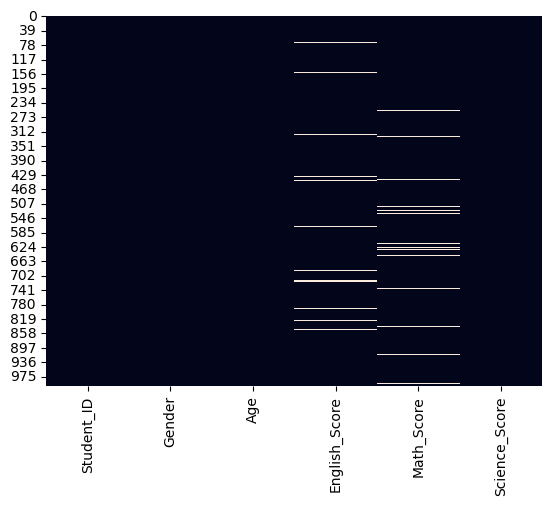

In [5]:
# Heatmap showing missing values (in white)
sns.heatmap(df.isnull(), cbar=False)

In [6]:
# Sum of total missing values in the data
df.isnull().sum()

Student_ID        0
Gender            0
Age               0
English_Score    29
Math_Score       33
Science_Score     0
dtype: int64

## Impute missing values (median)

I will be imputing the missing values with the median of the column

In [7]:
# Filling missing values in df
missing_list = ['English_Score', 'Math_Score']

for missing in missing_list:
    median = df[missing].median()
    df[missing] = df[missing].fillna(median)

## Checking if there is any remaining missing values 

<Axes: >

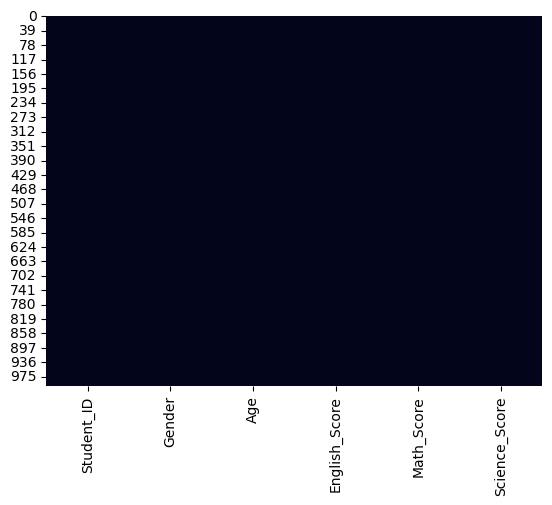

In [8]:
# Heatmap showing missing values (in white)
sns.heatmap(df.isnull(), cbar=False)

In [9]:
# Sum of total missing values in the data
df.isnull().sum()

Student_ID       0
Gender           0
Age              0
English_Score    0
Math_Score       0
Science_Score    0
dtype: int64

## Checking if there is any outliers

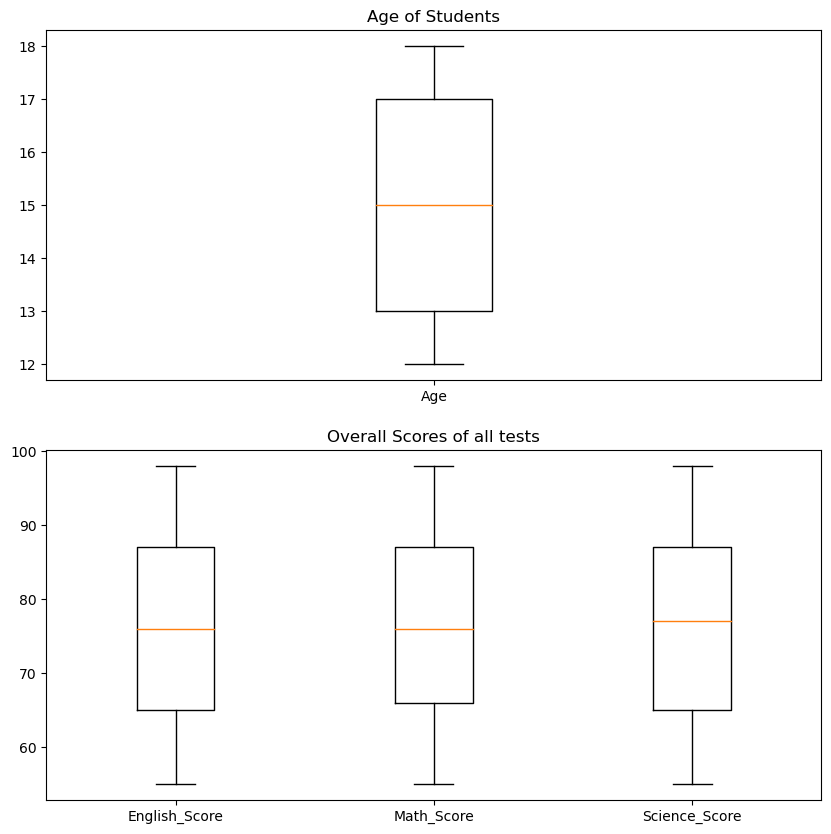

In [10]:
# Initializing a figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

ax1.set_title("Age of Students")
ax1.boxplot(df['Age'], labels = ['Age'])

ax2.boxplot(df[['English_Score', 'Math_Score', 'Science_Score']], labels = ['English_Score', 'Math_Score', 'Science_Score'])
ax2.set_title("Overall Scores of all tests")

    
plt.show()

After plotting the boxplots above, I can see that there are no outliers inside the data.

## Checking the values in the 'Gender' columns

In [11]:
# Checking the dataset
df.head()

,Student_ID,Gender,Age,English_Score,Math_Score,Science_Score
0,1,Female,18,64.0,56.0,60
1,2,Female,12,89.0,71.0,97
2,3,Female,18,69.0,69.0,80
3,4,Female,17,60.0,72.0,97
4,5,Male,13,71.0,76.0,76


In [12]:
# Checking what Genders are there
df['Gender'].value_counts()

Gender
Female         465
Male           430
Non-binary      21
Genderfluid     19
Genderqueer     18
Bigender        18
Agender         16
Polygender      13
Name: count, dtype: int64

In [13]:
# Creating a function to filter the genders
def categorise_gender(gender):
    if gender in ['Male', 'Female']:
        return gender
    else:
        return 'Others'

# Apply the categorize_gender function to filter the genders
df['Gender'] = df['Gender'].apply(categorise_gender)

# Checking what Genders are there
df['Gender'].value_counts()

Gender
Female    465
Male      430
Others    105
Name: count, dtype: int64

I have now filtered the genders into 3 sections:
- Males
- Females
- Others

This reduces the number of variables the model needs to learn and may improve the performance of the model. (Kind of like 'Dimensionality Reduction')

## One-Hot Encoding (Dummy Variables)

In [14]:
# Changing the 'Gender' from categorical into numerical variables
df = pd.get_dummies(df, dtype=int)

df.head()

,Student_ID,Age,English_Score,Math_Score,Science_Score,Gender_Female,Gender_Male,Gender_Others
0,1,18,64.0,56.0,60,1,0,0
1,2,12,89.0,71.0,97,1,0,0
2,3,18,69.0,69.0,80,1,0,0
3,4,17,60.0,72.0,97,1,0,0
4,5,13,71.0,76.0,76,0,1,0


## Standardization 

I'm applying Standardization on the numerical data, where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero, and the resultant distribution has a unit standard deviation. This is done to prevent the algorithm to be biased towards one feature.

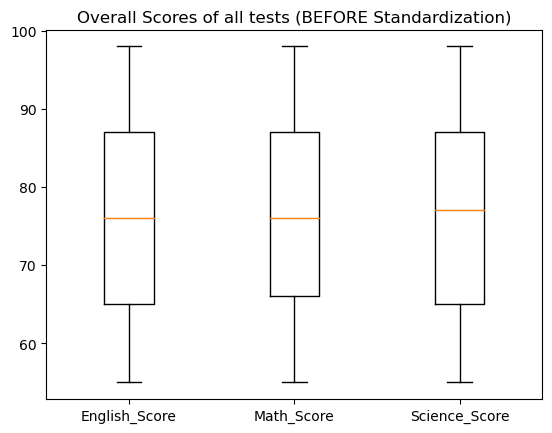

In [15]:
# Visualizing our numerical data BEFORE standardization
plt.boxplot(df[['English_Score', 'Math_Score', 'Science_Score']], labels = ['English_Score', 'Math_Score', 'Science_Score'])
plt.title("Overall Scores of all tests (BEFORE Standardization)")
 
plt.show()

In [16]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

In [17]:
# Initialize an empty DataFrame
scaled_df = pd.DataFrame()

# Initializing the Standard Scaler
std_scaler = StandardScaler()

# Fitting + Transforming the data (Standardization)
scaled_df[['English_Score', 'Math_Score', 'Science_Score', 'Age']] = std_scaler.fit_transform(df[['English_Score', 'Math_Score', 'Science_Score', 'Age']])

scaled_df.head()

,English_Score,Math_Score,Science_Score,Age
0,-0.961257,-1.674327,-1.272918,1.546825
1,1.026948,-0.457461,1.604172,-1.516194
2,-0.563616,-0.619709,0.282266,1.546825
3,-1.279370,-0.376336,1.604172,1.036321
4,-0.404560,-0.051838,-0.028771,-1.005691


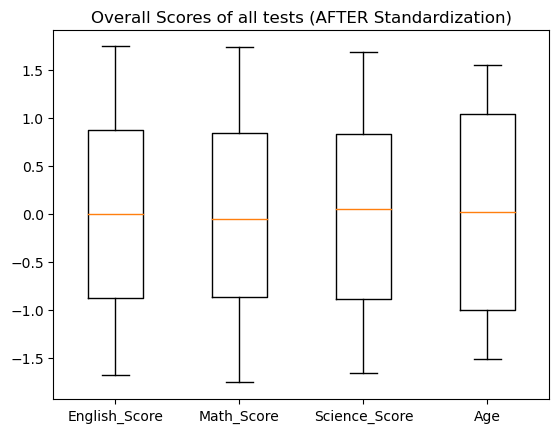

In [18]:
# Visualizing our numerical data AFTER standardization
plt.boxplot(pd.DataFrame(scaled_df[['English_Score', 'Math_Score', 'Science_Score', 'Age']]), labels = ['English_Score', 'Math_Score', 'Science_Score', 'Age'])
plt.title("Overall Scores of all tests (AFTER Standardization)")
 
plt.show()

## PCA 

In [19]:
# Import PCA
from sklearn.decomposition import PCA

In [20]:
# Creating a df to store the scaled data with the other features
scaled_df_copy = pd.concat([df[['Gender_Female', 'Gender_Male', 'Gender_Others']], scaled_df], axis=1)

# Applying PCA to the standardized data
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(scaled_df_copy), columns=['PCA1', 'PCA2'])

df_pca.head()

,PCA1,PCA2
0,0.861520,0.859010
1,0.232728,-2.138677
2,0.025629,0.291224
3,-1.187374,-0.720698
4,-0.403434,-0.499470


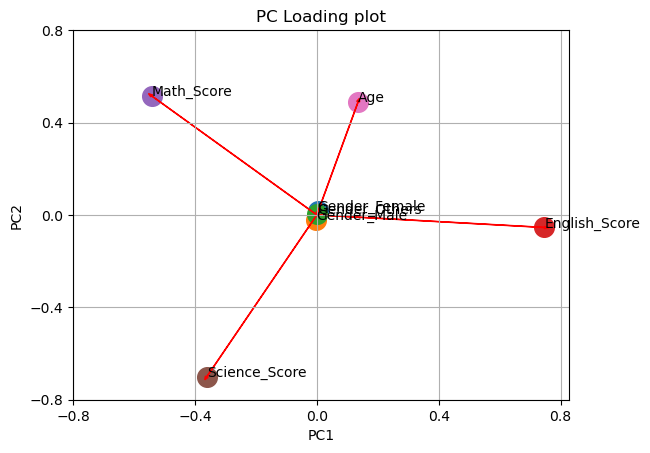

In [21]:
# Principal components correlation coefficients
loadings = pca.components_
 
# Number of features before PCA
n_features = pca.n_features_in_
 
# Feature names before PCA
feature_names = scaled_df_copy.columns
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
 
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
 
# Show plot
plt.title('PC Loading plot')
plt.show()

- PC1 is positively associated with English score & Age, but is negatively associated with Science score and Math score.

- PC2 is positively associated with Math score & Age while negatively associated with Science score.

# 2. Model

## KMeans

In [22]:
# Import KMeans
from sklearn.cluster import KMeans

# Import necessary libraries
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

### Finding the optimal k by silhouette score 

In [23]:
# Perform k-means clustering and plot the silhouette plots for k=2, k=3, and k=4
for i, k in enumerate(np.arange(2, 12)):
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(df_pca)
    cluster_labels = kmeans.labels_

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print(f"For n_clusters = {k}, the average silhouette_score is : {silhouette_avg}")

For n_clusters = 2, the average silhouette_score is : 0.3230450101746747
For n_clusters = 3, the average silhouette_score is : 0.3532729977105652
For n_clusters = 4, the average silhouette_score is : 0.33324292836386143
For n_clusters = 5, the average silhouette_score is : 0.3275641787452465
For n_clusters = 6, the average silhouette_score is : 0.35673259262118856
For n_clusters = 7, the average silhouette_score is : 0.3513210557951641
For n_clusters = 8, the average silhouette_score is : 0.33524542114700717
For n_clusters = 9, the average silhouette_score is : 0.3265740440056893
For n_clusters = 10, the average silhouette_score is : 0.3257368427598643
For n_clusters = 11, the average silhouette_score is : 0.3343484441024606


Highest Average Silhouette score for KMeans Clustering: 
#### 0.356 with 6 clusters

### Plotting scatter plot to visualize top 3 best k

For n_clusters = 3, the average silhouette_score is : 0.3532729977105652
For n_clusters = 6, the average silhouette_score is : 0.35673259262118856
For n_clusters = 7, the average silhouette_score is : 0.3513210557951641


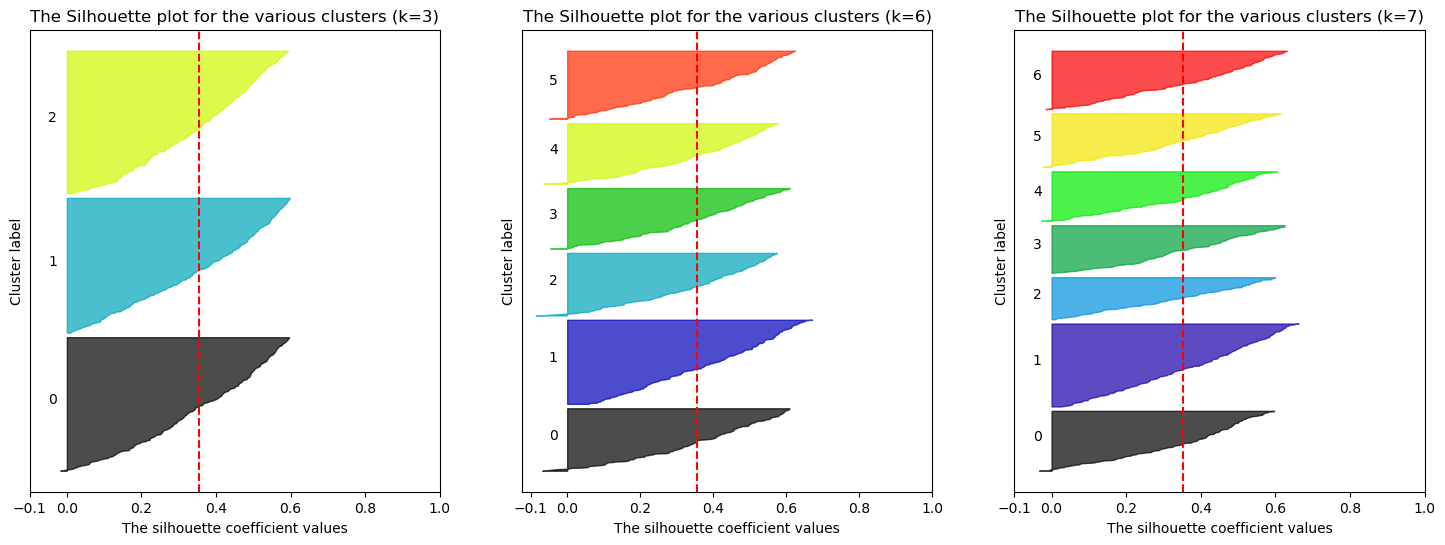

In [24]:
# Initialize the figure
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Perform k-means clustering and plot the silhouette plots for k=2, k=3, and k=4
for i, k in enumerate([3, 6, 7]):
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(df_pca)
    cluster_labels = kmeans.labels_

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print(f"For n_clusters = {k}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for j in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster j, and sort them
        jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        jth_cluster_silhouette_values.sort()

        size_cluster_j = jth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = cm.nipy_spectral(float(j) / k)
        ax[i].fill_betweenx(np.arange(y_lower, y_upper), 0, jth_cluster_silhouette_values, 
                            facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax[i].text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax[i].set_title(f"The Silhouette plot for the various clusters (k={k})")
    ax[i].set_xlabel("The silhouette coefficient values")
    ax[i].set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax[i].axvline(x=silhouette_avg, color="red", linestyle="--")

    ax[i].set_yticks([])  # Clear the yaxis labels / ticks
    ax[i].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

### Elbow Method to find the optimal k 

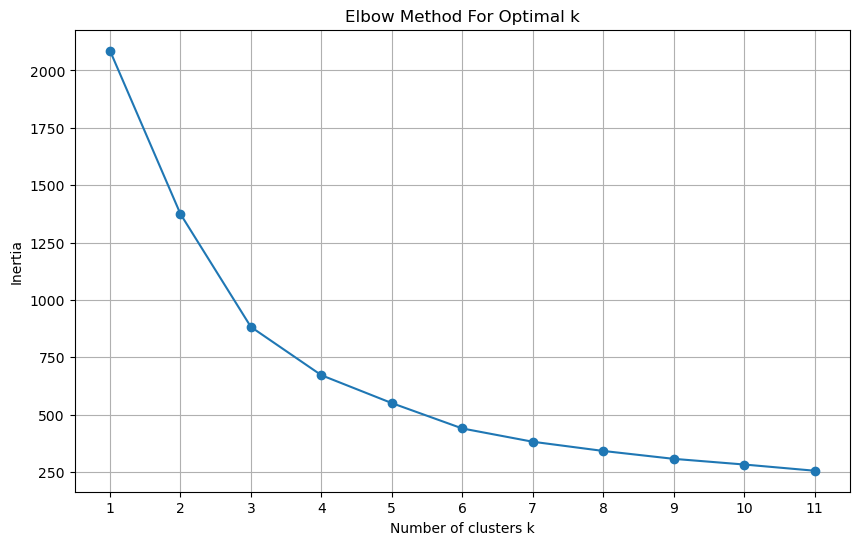

In [25]:
# Calculate the within-cluster sum of squares (inertia) for different numbers of clusters
inertia = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, n_init=10,random_state=10).fit(df_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), inertia, marker='o', linestyle='-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()

### Using the optimal k

In [26]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=6,  n_init=10, random_state=0).fit(df_pca)

# Add the predicted clusters by KMeans to the dataframe
df['predicted_KMeans'] = kmeans.labels_

df.head()

,Student_ID,Age,English_Score,Math_Score,Science_Score,Gender_Female,Gender_Male,Gender_Others,predicted_KMeans
0,1,18,64.0,56.0,60,1,0,0,5
1,2,12,89.0,71.0,97,1,0,0,4
2,3,18,69.0,69.0,80,1,0,0,1
3,4,17,60.0,72.0,97,1,0,0,2
4,5,13,71.0,76.0,76,0,1,0,1


### Boxplots to explain characteristics

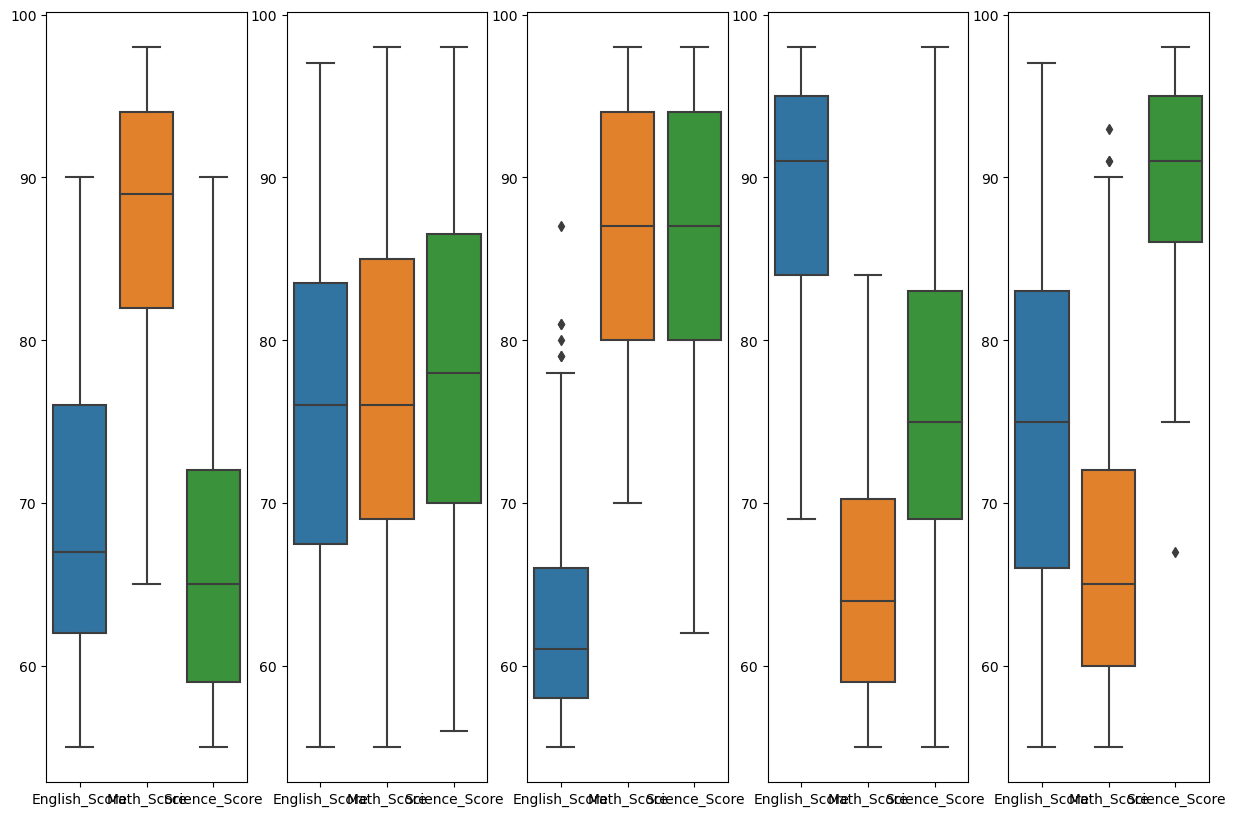

In [27]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5,figsize=(15,10))

sns.boxplot(df[df['predicted_KMeans'] == 0][['English_Score', 'Math_Score', 'Science_Score']], ax=ax1)
sns.boxplot(df[df['predicted_KMeans'] == 1][['English_Score', 'Math_Score', 'Science_Score']], ax=ax2)
sns.boxplot(df[df['predicted_KMeans'] == 2][['English_Score', 'Math_Score', 'Science_Score']], ax=ax3)
sns.boxplot(df[df['predicted_KMeans'] == 3][['English_Score', 'Math_Score', 'Science_Score']], ax=ax4)
sns.boxplot(df[df['predicted_KMeans'] == 4][['English_Score', 'Math_Score', 'Science_Score']], ax=ax5)

plt.show()

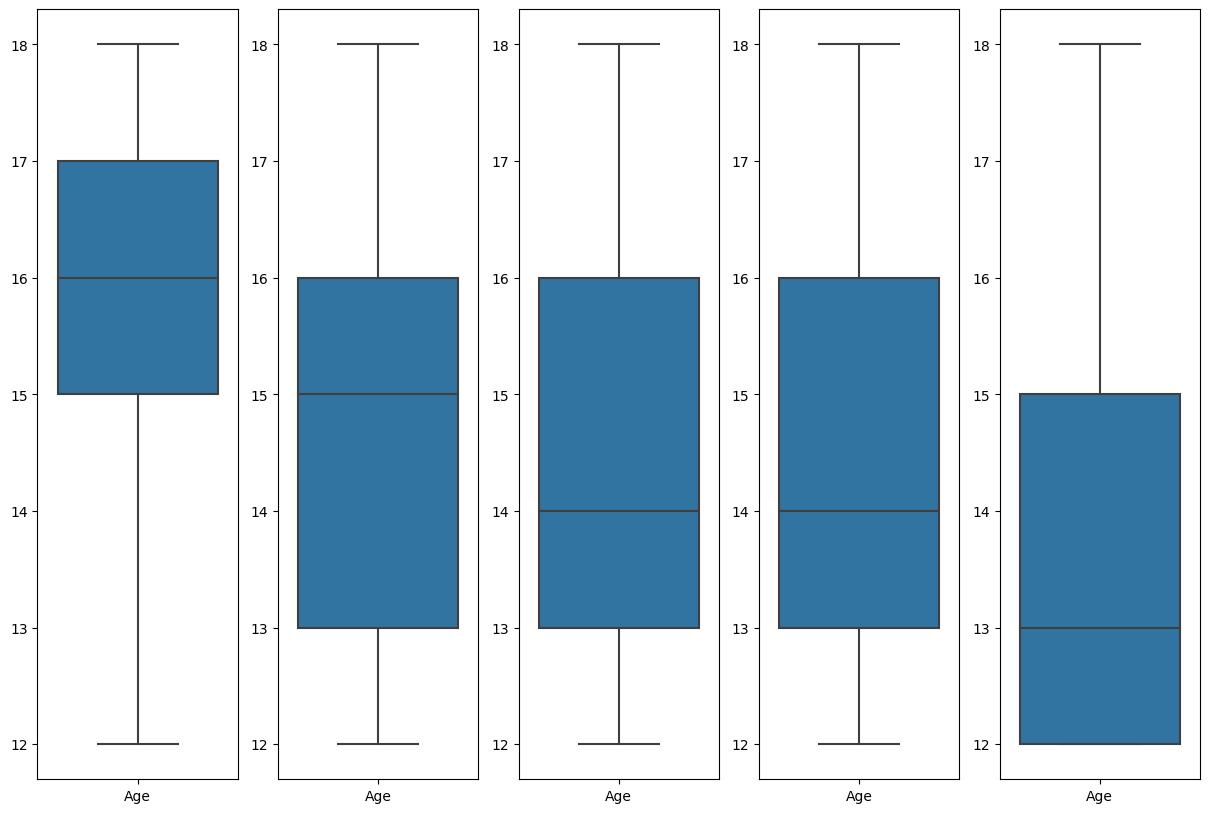

In [28]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5,figsize=(15,10))

sns.boxplot(df[df['predicted_KMeans'] == 0][['Age']], ax=ax1)
sns.boxplot(df[df['predicted_KMeans'] == 1][['Age']], ax=ax2)
sns.boxplot(df[df['predicted_KMeans'] == 2][['Age']], ax=ax3)
sns.boxplot(df[df['predicted_KMeans'] == 3][['Age']], ax=ax4)
sns.boxplot(df[df['predicted_KMeans'] == 4][['Age']], ax=ax5)

plt.show()

## Hierarchical Clustering

In [29]:
# Import required modules for Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform

### Finding the optimal k by silhouette score

In [30]:
# Perform Hierarchical clustering and plot the silhouette plots for k=2, k=3, and k=4
for i, k in enumerate(np.arange(2, 12)):
    # Perform Hierarchical clustering
    hc = AgglomerativeClustering(n_clusters=k, 
                             metric='euclidean',
                             linkage='ward')
    HC_labels = hc.fit_predict(df_pca)
    
    # Calculate the silhouette score
    HC_avg = silhouette_score(df_pca, HC_labels)
    print(f"For n_clusters = {k}, the average silhouette_score is : {HC_avg}")

For n_clusters = 2, the average silhouette_score is : 0.29327383589441786
For n_clusters = 3, the average silhouette_score is : 0.24692768087515504
For n_clusters = 4, the average silhouette_score is : 0.23817678840815654
For n_clusters = 5, the average silhouette_score is : 0.2725209968501218
For n_clusters = 6, the average silhouette_score is : 0.2846021499163249
For n_clusters = 7, the average silhouette_score is : 0.2872450373517482
For n_clusters = 8, the average silhouette_score is : 0.28887755773675483
For n_clusters = 9, the average silhouette_score is : 0.2934861280979114
For n_clusters = 10, the average silhouette_score is : 0.2824692399903513
For n_clusters = 11, the average silhouette_score is : 0.2778134957633804


Highest Average Silhouette score for Hierarchical Clustering: 
### 0.293 with 2 clusters

### Plotting scatter plot to visualize top 3 best k

For n_clusters = 2, the average silhouette_score is : 0.29327383589441786
For n_clusters = 9, the average silhouette_score is : 0.2934861280979114
For n_clusters = 11, the average silhouette_score is : 0.2778134957633804


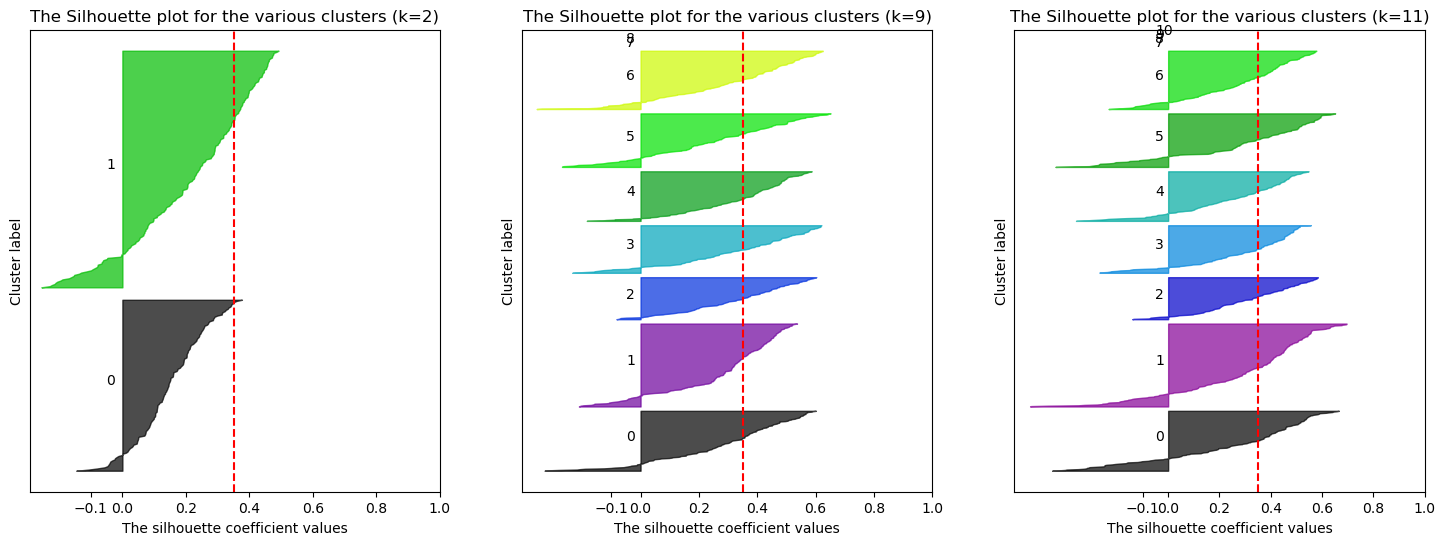

In [31]:
# Initialize the figure
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Perform Hierarchical clustering and plot the silhouette plots
for i, k in enumerate([2, 9, 11]):
    # Perform Hierarchical clustering
    hc = AgglomerativeClustering(n_clusters=k, 
                             metric='euclidean',
                             linkage='ward')
    HC_labels = hc.fit_predict(df_pca)

    # Calculate the silhouette score
    HC_avg = silhouette_score(df_pca, HC_labels)
    print(f"For n_clusters = {k}, the average silhouette_score is : {HC_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, HC_labels)

    y_lower = 10
    for j in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster j, and sort them
        jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        jth_cluster_silhouette_values.sort()

        size_cluster_j = jth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = cm.nipy_spectral(float(j) / k)
        ax[i].fill_betweenx(np.arange(y_lower, y_upper), 0, jth_cluster_silhouette_values, 
                            facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax[i].text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax[i].set_title(f"The Silhouette plot for the various clusters (k={k})")
    ax[i].set_xlabel("The silhouette coefficient values")
    ax[i].set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax[i].axvline(x=silhouette_avg, color="red", linestyle="--")

    ax[i].set_yticks([])  # Clear the yaxis labels / ticks
    ax[i].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

### Dendrogram

In [32]:
# Import modules for Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram

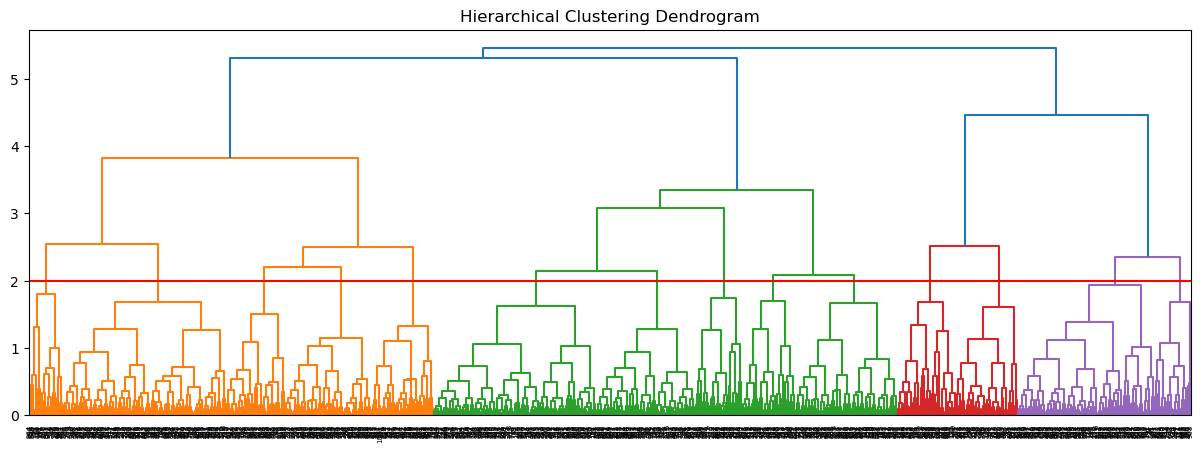

In [33]:
# Plotting the dendrogram for hierarchical clustering
linked = linkage(df_pca, method='complete')

plt.figure(figsize=(15, 5))
dendrogram(linked,
           orientation='top',
           labels=df['Student_ID'].values,
           distance_sort='descending',
           show_leaf_counts=True)
plt.axhline(y=2, color='r')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

From the dendrogram, I can identify 14 clusters separated by the Hierarical Clustering Model (Agglomerative Clustering).

### Using the optimal k

In [34]:
# Perform k-means clustering
HC = AgglomerativeClustering(n_clusters=2, 
                             metric='euclidean', 
                             linkage='ward')

# Add the predicted clusters by KMeans to the dataframe
df['predicted_HC'] = HC.fit_predict(df_pca)

df.head()

,Student_ID,Age,English_Score,Math_Score,Science_Score,Gender_Female,Gender_Male,Gender_Others,predicted_KMeans,predicted_HC
0,1,18,64.0,56.0,60,1,0,0,5,0
1,2,12,89.0,71.0,97,1,0,0,4,1
2,3,18,69.0,69.0,80,1,0,0,1,0
3,4,17,60.0,72.0,97,1,0,0,2,1
4,5,13,71.0,76.0,76,0,1,0,1,0


### Boxplots to explain characteristics 

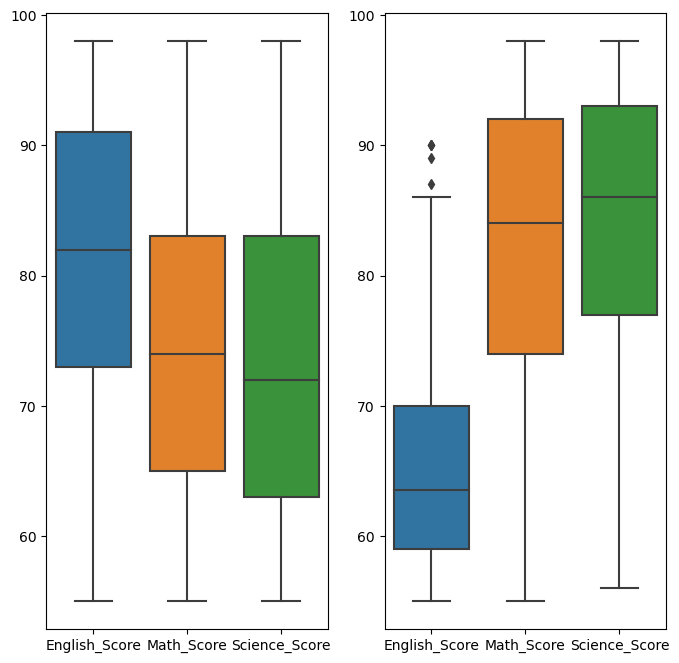

In [35]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,8))

sns.boxplot(df[df['predicted_HC'] == 0][['English_Score', 'Math_Score', 'Science_Score']], ax=ax1)
sns.boxplot(df[df['predicted_HC'] == 1][['English_Score', 'Math_Score', 'Science_Score']], ax=ax2)

plt.show()

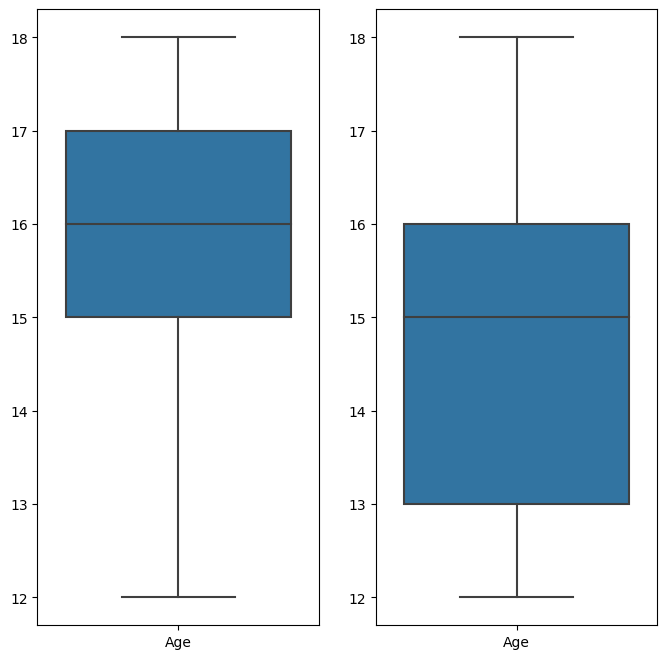

In [43]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,8))

sns.boxplot(df[df['predicted_KMeans'] == 0][['Age']], ax=ax1)
sns.boxplot(df[df['predicted_KMeans'] == 1][['Age']], ax=ax2)

plt.show()

## GMM Clustering

In [37]:
# Import GMM Clustering
from sklearn.mixture import GaussianMixture 

### Finding the optimal k by silhouette score

In [38]:
# Perform GMM clustering and plot the silhouette plots
for i, k in enumerate(np.arange(2, 12)):
    # Create GMM
    gmm = GaussianMixture(n_components=k, random_state=0)
    gmm.fit(df_pca)
    GMM_labels = gmm.predict(df_pca)

    # Calculate the silhouette score
    GMM_avg = silhouette_score(df_pca, GMM_labels)
    print(f"For n_clusters = {k}, the average silhouette_score is : {GMM_avg}")

For n_clusters = 2, the average silhouette_score is : 0.3237714555440539
For n_clusters = 3, the average silhouette_score is : 0.34699786913462843
For n_clusters = 4, the average silhouette_score is : 0.3303979840301353
For n_clusters = 5, the average silhouette_score is : 0.3298748341264656
For n_clusters = 6, the average silhouette_score is : 0.3555702283498505
For n_clusters = 7, the average silhouette_score is : 0.34670142154313294
For n_clusters = 8, the average silhouette_score is : 0.32917397376616236
For n_clusters = 9, the average silhouette_score is : 0.31875925231060065
For n_clusters = 10, the average silhouette_score is : 0.31605283369922005
For n_clusters = 11, the average silhouette_score is : 0.3135841081800701


Highest Average Silhouette score for GMM Clustering: 
#### 0.355 with 6 clusters

### Plotting scatter plot to visualize top 3 best k

For n_clusters = 3, the average silhouette_score is : 0.34699786913462843
For n_clusters = 6, the average silhouette_score is : 0.3555702283498505
For n_clusters = 7, the average silhouette_score is : 0.34670142154313294


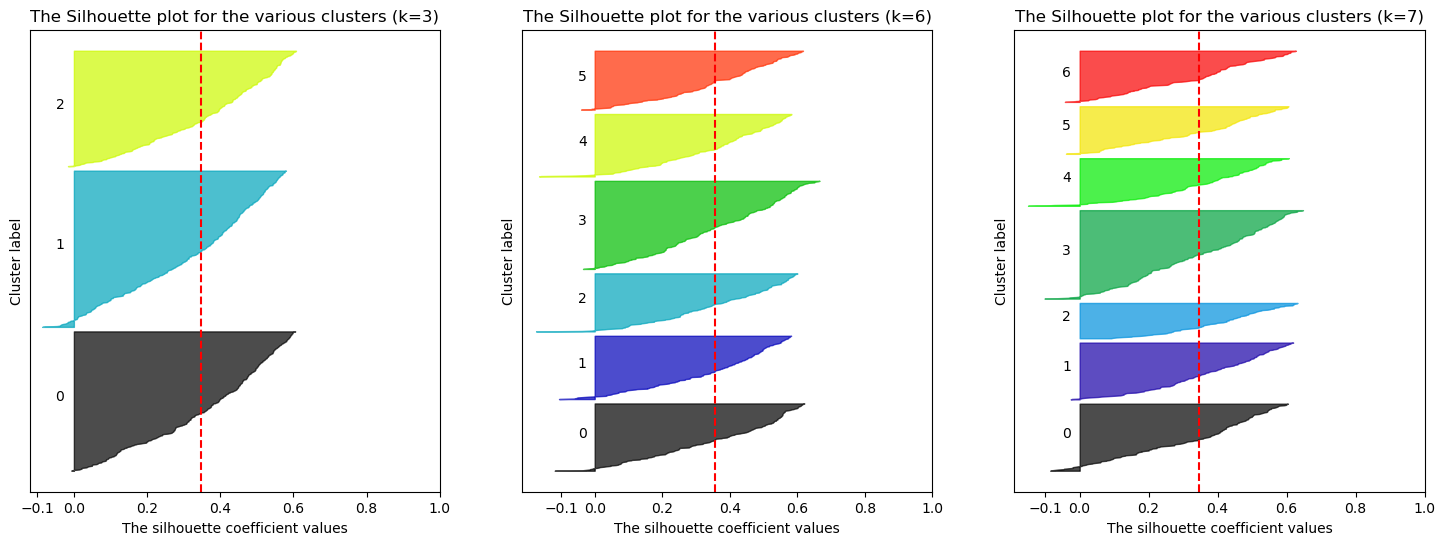

In [39]:
# Initialize the figure
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Perform GMM clustering and plot the silhouette plots for the k with the highest values
for i, k in enumerate([3, 6, 7]):
    # Create GMM
    gmm = GaussianMixture(n_components=k, random_state=0)
    gmm.fit(df_pca)
    GMM_labels = gmm.predict(df_pca)

    # Calculate the silhouette score
    GMM_avg = silhouette_score(df_pca, GMM_labels)
    print(f"For n_clusters = {k}, the average silhouette_score is : {GMM_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, GMM_labels)

    y_lower = 10
    for j in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster j, and sort them
        jth_cluster_silhouette_values = sample_silhouette_values[GMM_labels == j]
        jth_cluster_silhouette_values.sort()

        size_cluster_j = jth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = cm.nipy_spectral(float(j) / k)
        ax[i].fill_betweenx(np.arange(y_lower, y_upper), 0, jth_cluster_silhouette_values, 
                            facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax[i].text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax[i].set_title(f"The Silhouette plot for the various clusters (k={k})")
    ax[i].set_xlabel("The silhouette coefficient values")
    ax[i].set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax[i].axvline(x=GMM_avg, color="red", linestyle="--")

    ax[i].set_yticks([])  # Clear the yaxis labels / ticks
    ax[i].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

### Using the optimal k 

In [40]:
# Perform GMM clustering
GMM = GaussianMixture(n_components=6, random_state=0)
GMM.fit(df_pca)
GMM_labels = GMM.predict(df_pca)

# Add the predicted clusters
df['predicted_GMM'] = GMM.fit_predict(df_pca)

df.head()

,Student_ID,Age,English_Score,Math_Score,Science_Score,Gender_Female,Gender_Male,Gender_Others,predicted_KMeans,predicted_HC,predicted_GMM
0,1,18,64.0,56.0,60,1,0,0,5,0,0
1,2,12,89.0,71.0,97,1,0,0,4,1,1
2,3,18,69.0,69.0,80,1,0,0,1,0,3
3,4,17,60.0,72.0,97,1,0,0,2,1,4
4,5,13,71.0,76.0,76,0,1,0,1,0,3


### Boxplots to explain characteristics

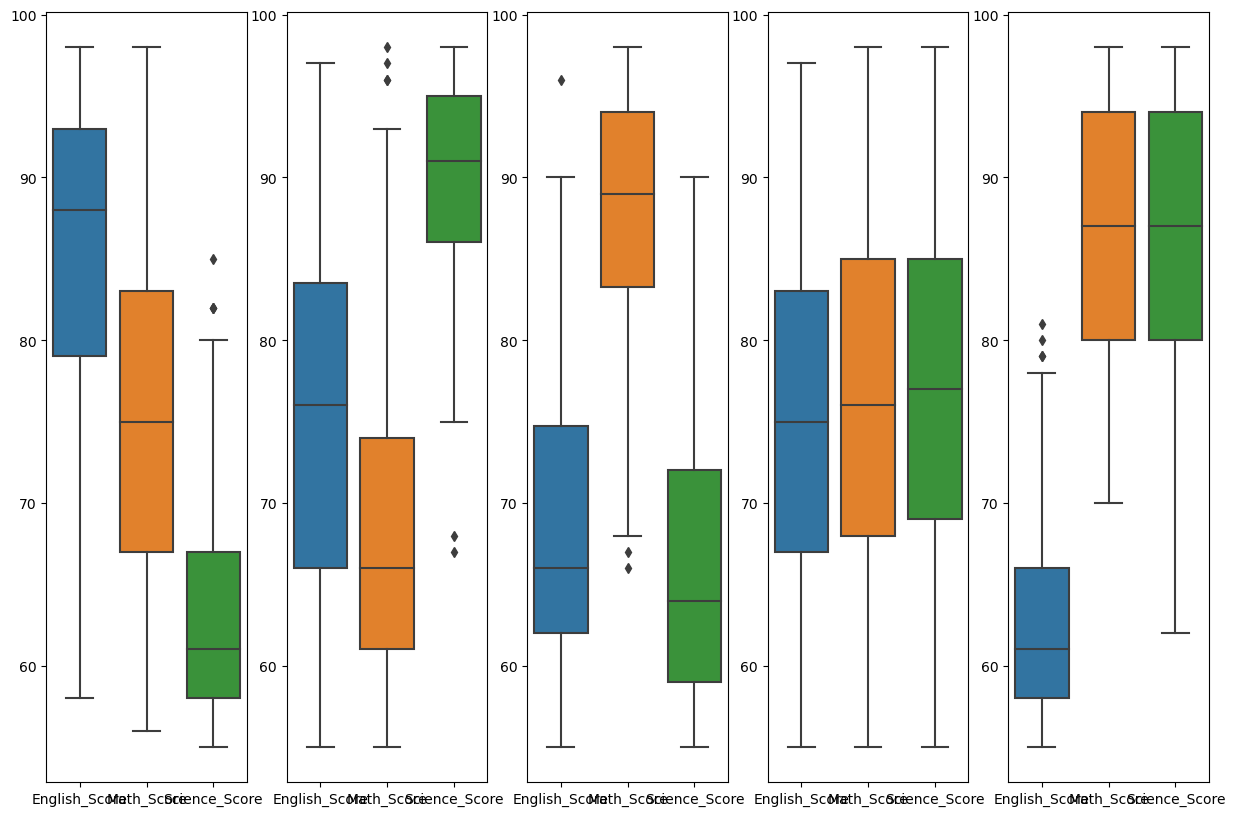

In [41]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5,figsize=(15,10))

sns.boxplot(df[df['predicted_GMM'] == 0][['English_Score', 'Math_Score', 'Science_Score']], ax=ax1)
sns.boxplot(df[df['predicted_GMM'] == 1][['English_Score', 'Math_Score', 'Science_Score']], ax=ax2)
sns.boxplot(df[df['predicted_GMM'] == 2][['English_Score', 'Math_Score', 'Science_Score']], ax=ax3)
sns.boxplot(df[df['predicted_GMM'] == 3][['English_Score', 'Math_Score', 'Science_Score']], ax=ax4)
sns.boxplot(df[df['predicted_GMM'] == 4][['English_Score', 'Math_Score', 'Science_Score']], ax=ax5)

plt.show()

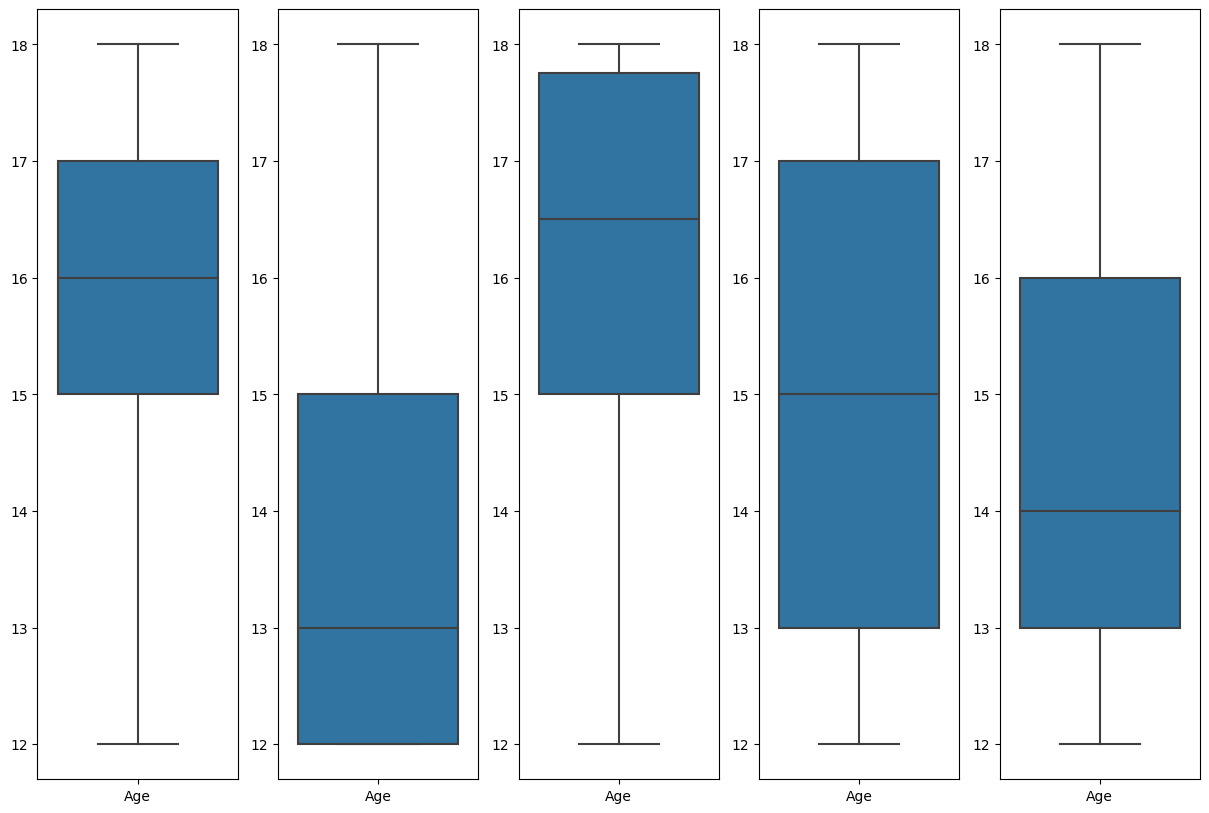

In [42]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5,figsize=(15,10))

sns.boxplot(df[df['predicted_GMM'] == 0][['Age']], ax=ax1)
sns.boxplot(df[df['predicted_GMM'] == 1][['Age']], ax=ax2)
sns.boxplot(df[df['predicted_GMM'] == 2][['Age']], ax=ax3)
sns.boxplot(df[df['predicted_GMM'] == 3][['Age']], ax=ax4)
sns.boxplot(df[df['predicted_GMM'] == 4][['Age']], ax=ax5)

plt.show()